<a href="https://colab.research.google.com/github/BrevinBrown/BrevinBrown/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Brevin Brown
801096385
ECGR 4105 
Homework 4

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import metrics


Problem 1

In [3]:
#load and format data
breast = load_breast_cancer()
X = breast.data
Y = breast.target
breast_input = pd.DataFrame(X)
breast_input.head()
model = SVC(kernel = 'linear')

In [4]:
def Run_PCA():
  acc=[]
  recall=[]
  precision=[]
  
  for i in range(1,30):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.20, random_state=97)
    model.fit(X_train, y_train)
    Y_pred = model.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, Y_pred))
    recall.append(metrics.recall_score(y_test,Y_pred))
    precision.append(metrics.precision_score(y_test, Y_pred))
    # print("i: "+str(i))
    # print("accuracy: "+str(acc[i-1]))
    # print("recall: "+str(recall[i-1]))
    # print("precision: "+str(precision[i-1]))
  return acc, recall, precision


In [5]:
def plot_stats():
  acc, recall, precision = Run_PCA()
  fig = plt.figure(figsize = (8,8))
  ax = fig.add_subplot(1,1,1)
  ax.set_xlabel('K', fontsize = 15)
  ax.set_ylabel('Percent', fontsize = 15)
  ax.set_title('PCA Accuracy, Precision, and Recall over n=K components', fontsize = 15)
  plt.plot(range(1,30),acc,color='blue',label='Accuracy')
  plt.plot(range(1,30),precision,color='red',label='Precision')
  plt.plot(range(1,30),recall,color='green',label='Recall')
  plt.legend()

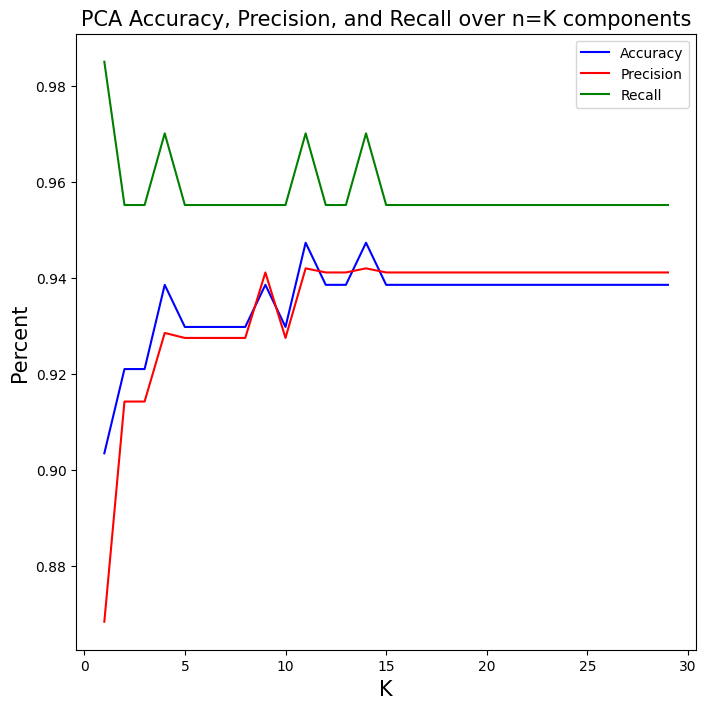

In [6]:
plot_stats()

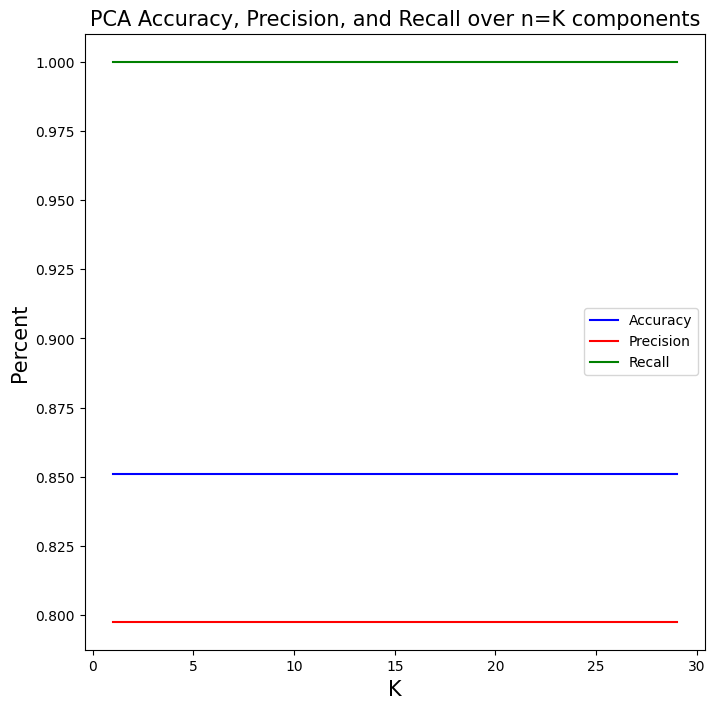

In [7]:
model = SVC(kernel = 'poly')
plot_stats()

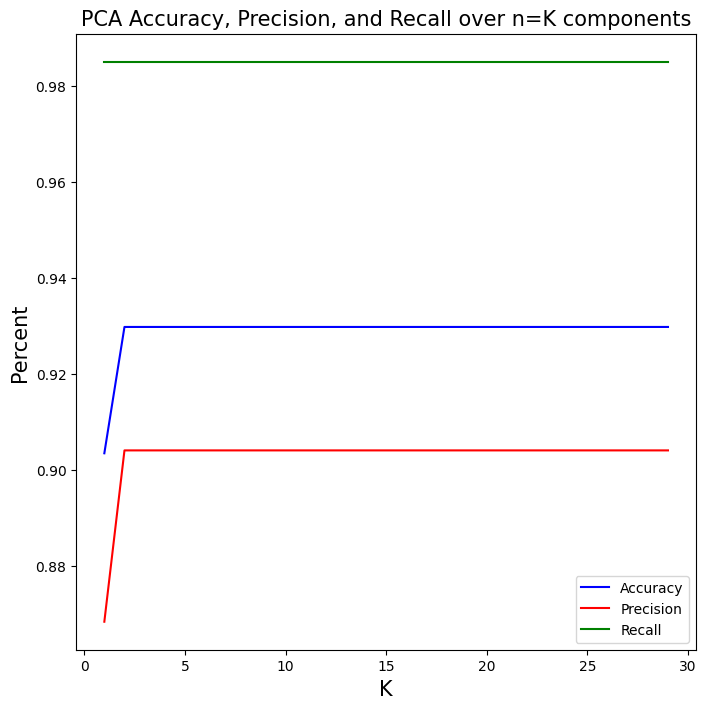

In [8]:
model = SVC(kernel = 'rbf')
plot_stats()

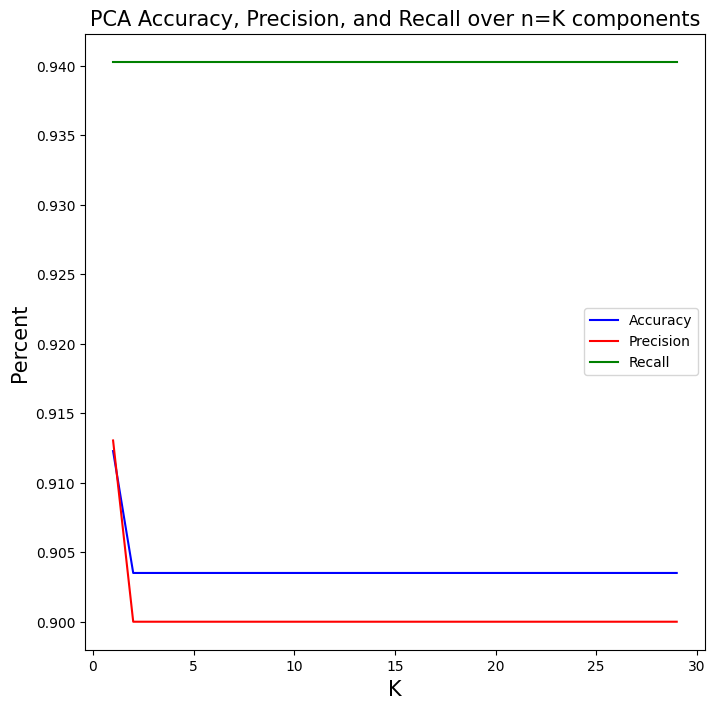

In [9]:
model = SVC(kernel = 'sigmoid')
plot_stats()

The best kernal type for this particular application is the linear type. With the best K vlaues at 11 and and 14 resulting in a tie between their scores.
When comparing the results to the posted solutions for the previous homework (Shown Below - To have the most accurate comparison target).
Other Kernel types had very quickly settled on their principle components at very low amount and then stayed constant passed that. 

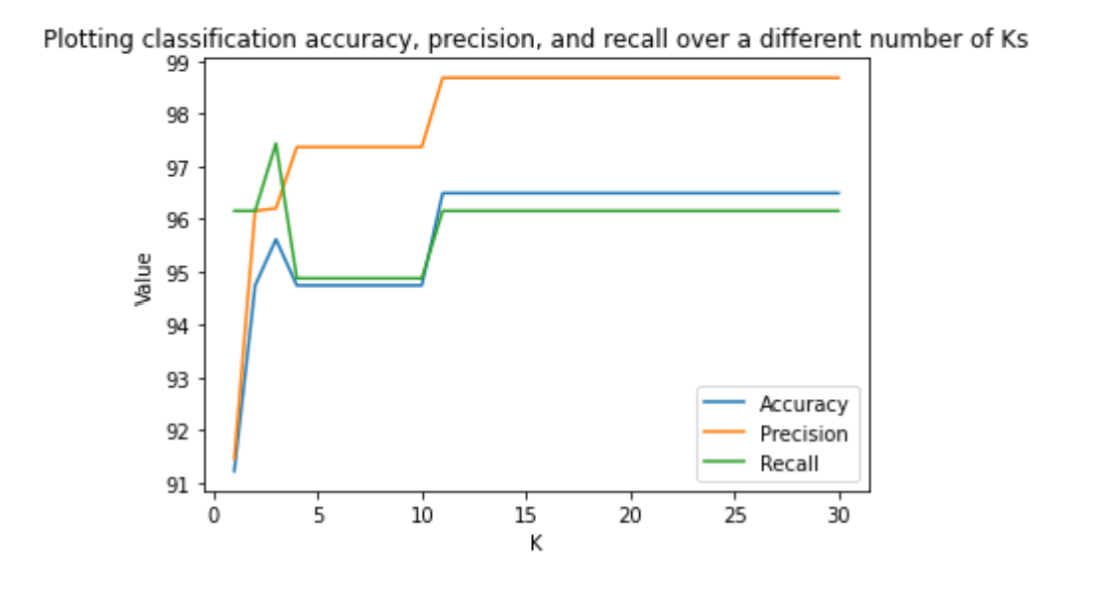

The Logistic regression classifier has higher overall results for its classifier. 

Problem 2

In [10]:
from sklearn.svm import SVR
dataset = pd.read_csv('/content/Housing.csv')
svar_list = ['mainroad', 'guestroom', 'basement', 'hotwaterheating','airconditioning', 'prefarea']
def bin_map(x):
  return x.map({'yes':1, 'no':0})

dataset[svar_list] = dataset[svar_list].apply(bin_map)
#dataset.head()
Y =  dataset['price']
#print(Y)
vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X = dataset[vars]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=97)

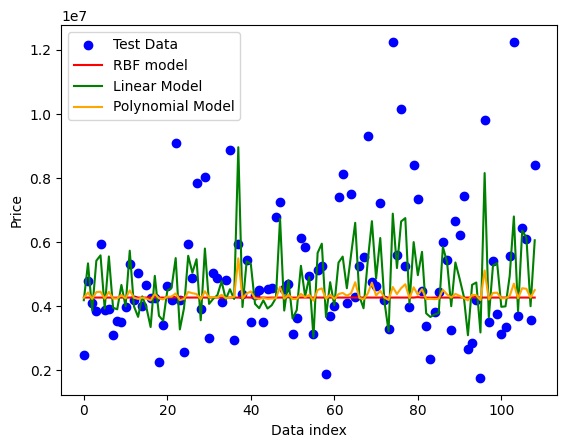

In [11]:
svr_rbf = SVR(kernel = 'rbf',C=1e3,gamma=0.1)
svr_lin = SVR(kernel = 'linear', C=1e3)
svr_poly = SVR(kernel = 'poly',C=1e3,degree=2)
y_rbf = svr_rbf.fit(X_train,y_train).predict(X_test)
y_lin = svr_lin.fit(X_train,y_train).predict(X_test)
y_poly = svr_poly.fit(X_train,y_train).predict(X_test)

plt.scatter(range(0,109),y_test,color='blue',label='Test Data')
plt.plot(y_rbf, color = 'red', label='RBF model')
plt.plot(y_lin,color='green',label='Linear Model')
plt.plot(y_poly,color='orange',label='Polynomial Model')
plt.xlabel('Data index')
plt.ylabel('Price')
plt.legend()


In [12]:
def MSE(y,ypred):
  return 1/109*((y-ypred)**2).sum()

In [13]:
def Run_PCA_part2(model):
  error=[]

  for i in range(1,11):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.20, random_state=97)
    Y_pred = model.fit(X_train, y_train).predict(X_test)

    error.append(MSE(y_test,Y_pred))

  return error

In [14]:
def plot_stats_part2(model):
  error = Run_PCA_part2(model)
  #plt.scatter(range(1,11),y_test,color='blue',label='Test Data')
  plt.scatter(range(1,11),error, color = 'red', label='error')
  
  plt.xlabel('K value')
  plt.ylabel('error')
  plt.legend()

 

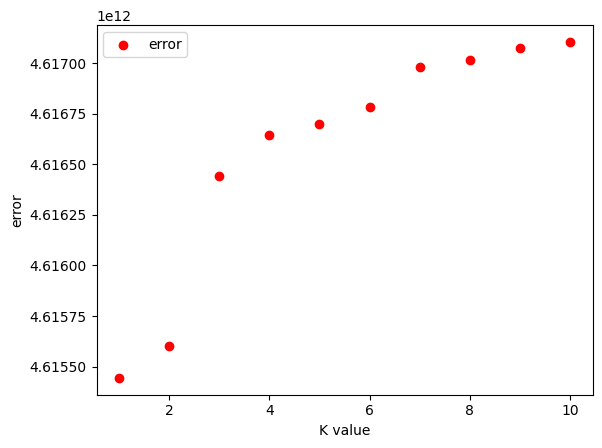

In [15]:
plot_stats_part2(svr_rbf)

In [16]:
#plot_stats_part2(svr_lin)
#froze when runnining this step

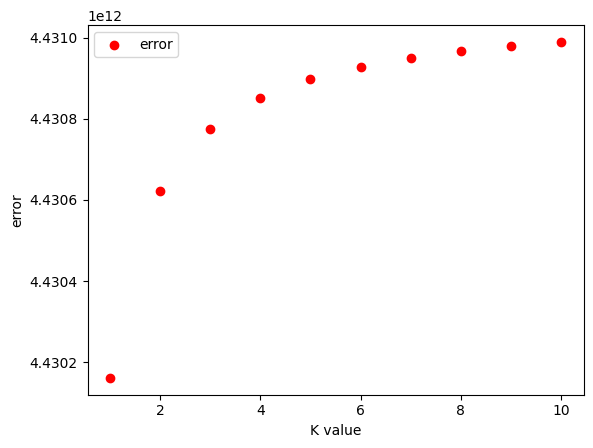

In [17]:
plot_stats_part2(svr_poly)

Not sure what is specifically meant by accuracy of a regression function so i figured the one with the least error is probably best. For error I used a simple mean squared error function. Of the two kernel functions i used for this step the polynomial kernel resulted with the smaller error over all K's and therefor should be the more accurate of the two kernel types.